# Specyfikacja podstawowa

## Grupa docelowa
Grupa docelowa narzędzia AutoML to analitycy danych, inżynierowie uczenia maszynowego oraz badacze, którzy chcą szybko prototypować modele uczenia maszynowego bez konieczności manualnego strojenia hiperparametrów. Narzędzie jest szczególnie przydatne dla osób pracujących z klasyfikacją.

## Specyfikacja narzędzia

### 1. Algorytmy klasyfikacyjne
Narzędzie obsługuje szeroki zakres algorytmów klasyfikacyjnych, takich jak:
- **Decision Trees**: Algorytm bazowy do interpretowalnej klasyfikacji.
- **Random Forest**: Wykorzystuje las losowych drzew dla poprawy dokładności.
- **Support Vector Machines (SVM)**: Wysoka skuteczność w problemach liniowych i nieliniowych.
- **XGBoost**: Gradient boosting dla wysokiej wydajności.

### 2. Metody optymalizacji
- **Grid Search**: Wyznaczanie optymalnych parametrów poprzez przeszukiwanie wszystkich kombinacji.
- **Random Search**: Losowe próbkowanie przestrzeni parametrów dla szybszych wyników.
- **Bayesian Optimization (do dodania)**: Inteligentne próbkowanie oparte na wcześniejszych wynikach.

### 3. Elastyczne przetwarzanie danych
- Obsługa brakujących danych (`mean`, `median`, `most_frequent`).
- Skalowanie numerycznych cech (`StandardScaler`, `MinMaxScaler`).
- Enkodowanie cech kategorycznych (`OneHotEncoder`).

### 4. Metryki ewaluacji
- **Accuracy**: Procent poprawnie sklasyfikowanych próbek.
- **F1-Score**: Średnia harmoniczna precyzji i czułości.
- **ROC-AUC**: Obszar pod krzywą ROC.
- **Confusion Matrix**: Macierz błędów, pokazująca poprawność predykcji.

### 5. Generowanie raportów
- Automatyczne generowanie raportów w formacie HTML, zawierających:
  - Wyniki metryk.
  - Wizualizacje, takie jak macierz pomyłek czy wykresy konwergencji.


Przykładowe wiersze z datasetu:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Training model: DecisionTreeClassifier
Best score for DecisionTreeClassifier: 0.9296703296703297
Training model: RandomForestClassifier
Best score for RandomForestClassifier: 0.9648351648351647
Training model: SVC
Best score for SVC: 0.9802197802197803
Training model: XGBClassifier
Best score for XGBClassifier: 0.9780219780219781
Best model: Pipeline(steps=[('model',
                 SVC(C=0.01, class_weight='balanced', degree=5, gamma='auto',
                     kernel='linear', probability=True, random_state=42))])
=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



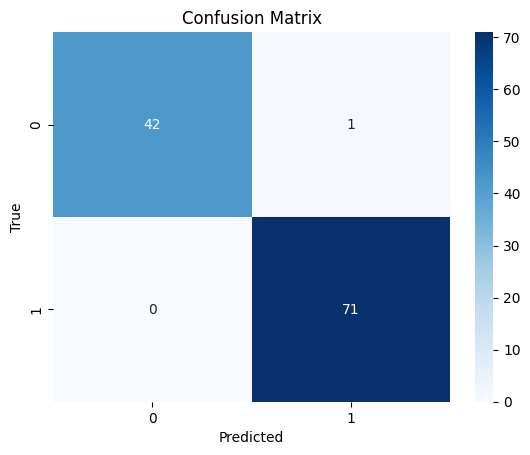

Raport został zapisany jako report.html


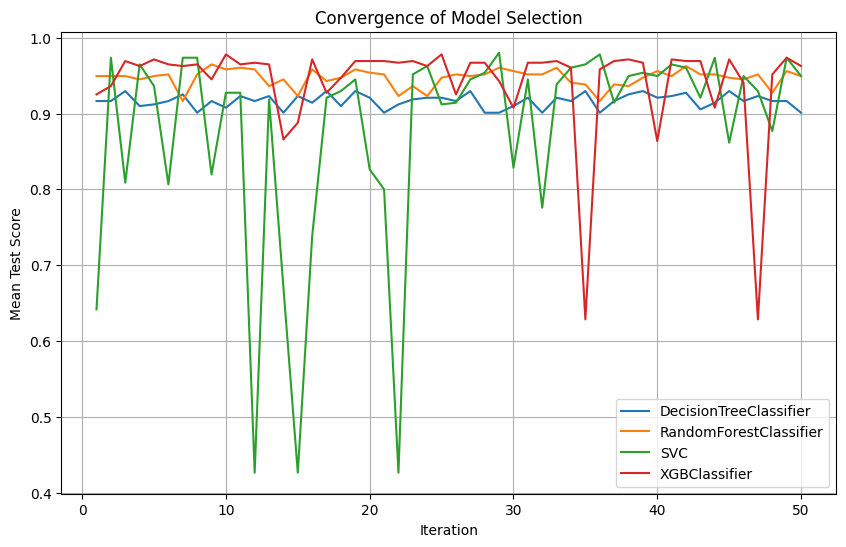

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from automlclassifier import AutoMLClassifier

# --------------------------------------------------
# 1. Przygotowanie danych
# --------------------------------------------------
data = load_breast_cancer(as_frame=True)
df = data.frame
df['target'] = data.target

print("Przykładowe wiersze z datasetu:")
display(df.head())

# Podział na cechy i etykiety
X = df.drop('target', axis=1)
y = df['target']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------------------------
# 2. Uruchomienie AutoMLClassifier
# --------------------------------------------------
pipeline = AutoMLClassifier(
    strategy_num="mean",
    strategy_cat="most_frequent",
    search_method="random",
    scoring="accuracy",
    n_iter=50,
    cv=5,
    random_state=42
)

# Trening pipeline'u
pipeline.fit(X_train, y_train)

print("Best model:", pipeline.model_selector.best_model)

# --------------------------------------------------
# 3. Ewaluacja i generowanie raportu
# --------------------------------------------------
pipeline.evaluate(X_test, y_test, report_path="report.html")

print("Raport został zapisany jako report.html")

# --------------------------------------------------
# 4. Wizualizacja zbieżności
# --------------------------------------------------
pipeline.plot_convergence()
